
# Classification

## Demo 2 : Decision Tree in Python

In this demo, you will learn how to apply decision tree algorithm in Python using scikit-learn library.

---

## Problem Statement

The dataset contains information about 3 brands namely US,Japan, Europe. Other parameters are mpg, cylinders, cubicinches, hp, weightlbs, time-to-60, year. The task is to find the brand of a car using these parameters.

---

## Importing Required Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn import metrics

## Dataset

In [9]:
#Reading the dataset using pandas
car_data=pd.read_csv('cars.csv')
car_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'cars.csv'

## Data Analysis

In [ ]:
#Dataset shape to get row and column count
car_data.shape

<div style="background-color:##EDF9FF">
  <ul><li><h3>Checking Null Values</h3></li></ul>
</div>

In [ ]:
#Checking for any null values
car_data.isnull().sum()

In [ ]:
car_data.info()

In [14]:
print(car_data.describe(include='object'))

NameError: name 'car_data' is not defined

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">
        None of the columns contain null values so there is no need to remove/replace data
    </span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3>Encoding Target Variable</h3></li></ul>
</div>

In [3]:
#Using labelencoder to encode the target variable
lb=LabelEncoder()
car_data['brand']=lb.fit_transform(car_data['brand'])
print(car_data)

NameError: name 'LabelEncoder' is not defined

In [5]:
#One-Hot Encoding----->DIY
#Get_Dummies()---->DIY

<div style="background-color:##EDF9FF">
  <ul><li><h3>Divide Feature And Target Varaibles</h3></li></ul>
</div>

In [13]:
#Divide the dataset into independent and dependent variables
X=car_data.drop('brand',axis=1)
y=car_data['brand']

<div style="background-color:##EDF9FF">
  <ul><li><h3>Training And Testing Set</h3></li></ul>
</div>

In [14]:
#Split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) #20 percent of data will be used for testing purpose

## Decision Tree Training

The following parameters should be considered during training a decision tree:
- __criterion__: To measure quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
- __spliter__: Either 'best' to choose best split or 'random' to choose random best split. By default takes 'best' value.
- __max_features__: Number of features to consider.
- __max_depth__: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.


The classifier has several parameter which are used depending on the requirement. For more information about thsese parameters you can visit:<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>Decision Tree</a>

In [1]:
dt_car=DecisionTreeClassifier(criterion='gini',splitter='best',max_features=6,max_depth=3)
dt_car.fit(X_train,y_train)

NameError: name 'DecisionTreeClassifier' is not defined

## Visualizing Decision Tree

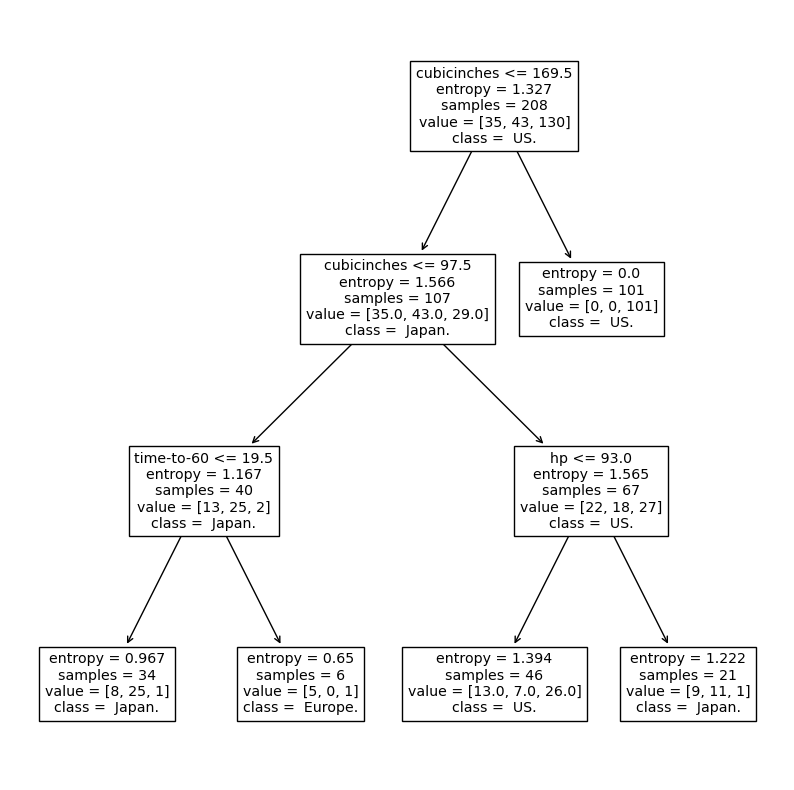

In [23]:
#plot tree can also be used for visualising the tree
plt.figure(figsize=(10,10))
plot_tree(dt_car,class_names=list(lb.classes_),feature_names=list(X_train.columns))
plt.show()

In [38]:
#Calculating accuracy
pred = dt_car.predict(X_test) #Unknown
print('Test Accuracy is:',accuracy_score(y_test,pred)*100)

Test Accuracy is: 79.24528301886792


In [39]:
print(metrics.classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.31      1.00      0.47         4
           1       0.88      0.50      0.64        14
           2       0.97      0.89      0.93        35

    accuracy                           0.79        53
   macro avg       0.72      0.80      0.68        53
weighted avg       0.89      0.79      0.81        53



In [32]:
print(pred)

[2 2 2 2 2 1 1 2 0 2 2 1 1 2 1 2 2 2 2 1 2 2 1 1 1 2 1 2 2 2 2 2 2 2 1 0 2
 2 1 2 1 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 1 2 2 2 1 2 1 2
 1 1 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 1 2 1 2 2 1 2 2 1 2 2 2 2 1 2 2 2 1 2 2
 2 1 2 2 2 2 2 2 1 2 2 2 2 2 1 2 1 2 2 0 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 0 2 2 2 1 2 2 1 2 1 2 2 2 2 2 1 1 2 2 1 2 1 2 2 2 2 1 2 1 1 2 2 2 2 2 1 1
 2 2 2 1 1 2 1 2 2 2 2 0 2 2 1 2 1 2 2 2 0 1 1]


In [28]:
pred = dt_car.predict(X_train)
print('Train Accuracy is:',accuracy_score(y_train,pred)*100)

Train Accuracy is: 80.76923076923077


In [29]:
dt_car.feature_importances_

array([0.        , 0.        , 0.83259865, 0.10114439, 0.        ,
       0.06625696, 0.        ])

## Feature Importance

In [30]:
'''
- Selecting only the important features
'''
features=pd.DataFrame({'Features':X_train.columns,'Importance':np.round(dt_car.feature_importances_,3)})
features=features.sort_values('Importance',ascending=False)

In [ ]:
print(car_data.corr())

In [31]:
features

,Features,Importance
2,cubicinches,0.833
3,hp,0.101
5,time-to-60,0.066
1,cylinders,0.000
0,mpg,0.000
4,weightlbs,0.000
6,year,0.000


<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">
        The above data shows which feature is important based on criterion provided
    </span>
</div>

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">
        We can select the required important features and retrain the model
    </span>
</div>

---

# Random Forest   Ensamble Learning

The following parameters should be considered before using random forest classifier:
- __n_estimators__: Integer value to define number of trees in the forest.
- __criterion__: To measure quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

For information about rest of the parameters: <a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier'>Random Forest</a>

In [ ]:
#Training
rf_car=RandomForestClassifier(n_estimators=100, criterion='entropy',max_depth=3)
rf_car.fit(X_train,y_train)

In [ ]:
#Calculating accuracy
pred = rf_car.predict(X_test)
print('Test Accuracy is:',accuracy_score(y_test,pred))

In [ ]:
#Calculating accuracy
pred = rf_car.predict(X_train)
print('Train Accuracy is:',accuracy_score(y_train,pred))

In [ ]:
features=pd.DataFrame({'Features':X_train.columns,'Importance':np.round(rf_car.feature_importances_,3)})
features=features.sort_values('Importance',ascending=False)
print(features)

## Visualising 

In [ ]:
#Visualing a single estimator
plt.figure(figsize=(20,10))
plot_tree(rf_car.estimators_[5],feature_names=X_train.columns,class_names=list(lb.classes_),fontsize=12)
plt.show()

<b><i>Conclusion</i></b>: In this demonstration, we have learned to apply and visualize decision tree algorithm and random forest classifier.